### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5


### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Бармина Ольга Константиновна
##### Группа:   НФИбд-01-19

## Москва 2022
***

### Вариант №16

1.	Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.  

2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс. 

3.	Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов.  

4.	Выполните стандартизацию признаков набора данных.  

5.	Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений.

6.	Визуализируйте набора данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описания набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

7.	Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%. 

8. 	Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6.  

9. 	Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов.  

10.	Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п. 9.  

### Индивидуальный вариант:

Wine Quality Data Set 

Название файла: winequality-red.csv 

Ссылка: https://archive.ics.uci.edu/ml/datasets/Wine+Quality 

Класс: quality (столбец No 12) 

Метод отбора признаков – одномерный отбор признаков (SelectKBest) 

Модели классификации: 

-       наивный байесовский классификатор 

-       классификатор метода опорных векторов   

-       классификатор метода опорных векторов с полиномиальными зависимостями (degree=2) 

Кривая для визуализации - ROC-кривая 

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1.	Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.  

In [31]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

df = pd.read_csv(url, sep=';', on_bad_lines='skip')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс. 

In [32]:
df.isnull().sum(axis=0)
# пустые значения отсутствуют во всем наборе данных

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [33]:
df.groupby('quality').count()
# всего 6 классов

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


In [34]:
df.loc[df.quality < 6, 'quality'] = 0
df.loc[df.quality >= 6, 'quality'] = 1

df.groupby('quality').count()
# сгруппируем по 3 класса, тем самым получив новые 2 класса

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
0,744,744,744,744,744,744,744,744,744,744,744
1,855,855,855,855,855,855,855,855,855,855,855


3.	Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов.  

In [35]:
df.dtypes
# все признаки распознаны верно

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

4.	Выполните стандартизацию признаков набора данных.  

In [36]:
X = df.drop('quality', axis=1)
Y = df['quality']

In [37]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_st = standardScaler.transform(X)
X_st

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

5.	Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений. 

In [38]:
from sklearn.feature_selection import SelectKBest,f_classif

# отбор признаков
test = SelectKBest(score_func=f_classif, k=2)
fit = test.fit(X_st, Y)

# оценки признаков
print("\nОценки признаков:\n",fit.scores_)

cols = test.get_support(indices=True)
df_new = df.iloc[:,cols]
print("\nОтобранные признаки:\n",df_new.head())


Оценки признаков:
 [1.45730876e+01 1.84022796e+02 4.14901228e+01 7.45410259e-03
 1.93786591e+01 6.11410958e+00 9.08160161e+01 4.14797235e+01
 1.70139626e-02 7.97376798e+01 3.72194765e+02]

Отобранные признаки:
    volatile acidity  alcohol
0              0.70      9.4
1              0.88      9.8
2              0.76      9.8
3              0.28      9.8
4              0.70      9.4


6.	Визуализируйте набора данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описания набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

In [39]:
X2 = df[['volatile acidity', 'alcohol']]
X2

,volatile acidity,alcohol
0,0.700,9.4
1,0.880,9.8
2,0.760,9.8
3,0.280,9.8
4,0.700,9.4
...,...,...
1594,0.600,10.5
1595,0.550,11.2
1596,0.510,11.0
1597,0.645,10.2


In [40]:
# создадим дополнительные датафреймы, содержащие 2 признака и одну из меткок класса
df_tmp = df[['volatile acidity', 'alcohol', 'quality']]
x_tmp0 = df_tmp.loc[df.quality == 0]
x_tmp1 = df_tmp.loc[df.quality == 1]

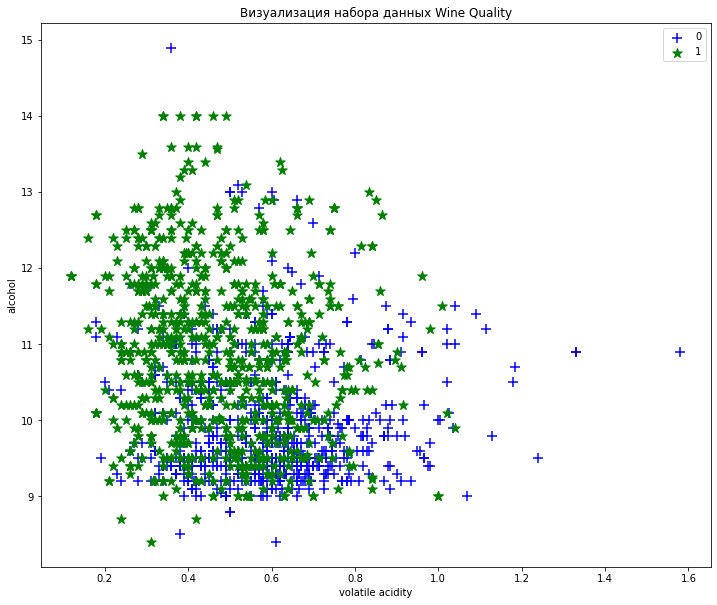

In [41]:
plt.figure(figsize=(12,10))
plt.scatter(x_tmp0['volatile acidity'], x_tmp0['alcohol'], marker='+', color='b', s=100, label='0')
plt.scatter(x_tmp1['volatile acidity'], x_tmp1['alcohol'], marker='*', color='g', s=100, label='1')

plt.xlabel('volatile acidity')
plt.ylabel('alcohol')
plt.title("Визуализация набора данных Wine Quality")
plt.legend()

7.	Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%. 

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.3)

In [43]:
# наивный байесовский классификатор
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,y_train)
y_pred_nbc = nbc.predict(X_test)

In [44]:
# классификатор метода опорных векторов
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e10)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [45]:
# классификатор метода опорных векторов с полиномиальными зависимостями
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("linearSVC", LinearSVC(C=C))
    ])

poly_svc = PolynomialSVC(degree=2, C=1e10)
poly_svc.fit(X_train,y_train)
y_pred_poly = poly_svc.predict(X_test)

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


8. 	Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6.  

In [46]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

D:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


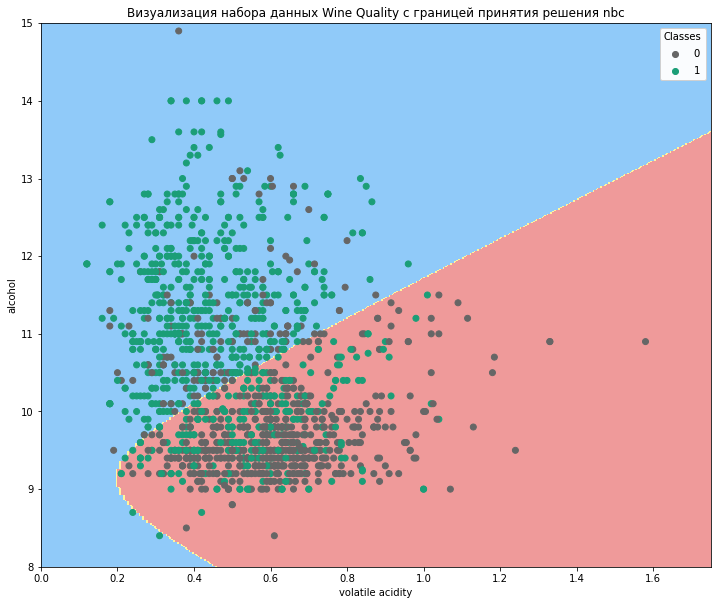

In [58]:
fig,ax = plt.subplots(figsize=(12,10))
plot_decision_boundary(nbc, axis=[0, 1.75, 8, 15])
scatter = ax.scatter(X2['volatile acidity'], X2['alcohol'], c=Y, cmap=plt.cm.Dark2_r, label=Y)
#plt.scatter(x_tmp1['volatile acidity'], x_tmp1['alcohol'], color='g', label='1')
ax.set_xlabel('volatile acidity')
ax.set_ylabel('alcohol')
plt.title("Визуализация набора данных Wine Quality c границей принятия решения nbc")
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

D:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


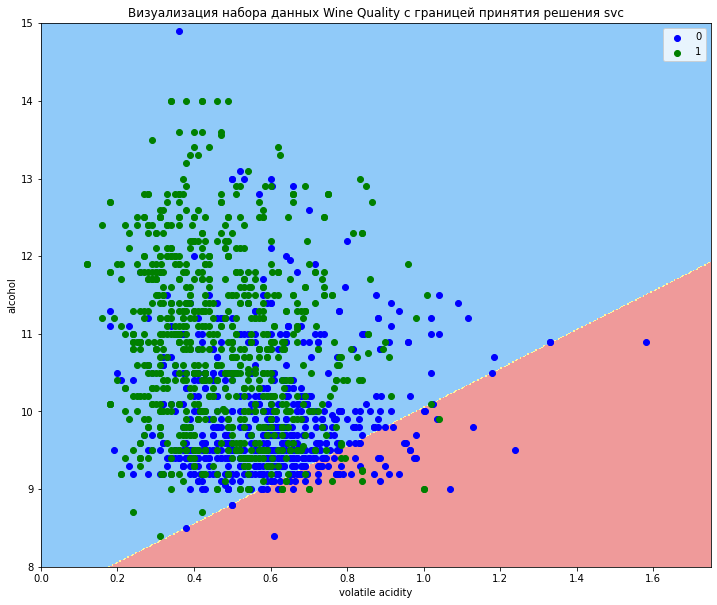

In [48]:
plt.figure(figsize=(12,10))
plot_decision_boundary(svc, axis=[0, 1.75, 8, 15])
plt.scatter(x_tmp0['volatile acidity'], x_tmp0['alcohol'], color='b', label='0')
plt.scatter(x_tmp1['volatile acidity'], x_tmp1['alcohol'], color='g', label='1')
plt.xlabel('volatile acidity')
plt.ylabel('alcohol')
plt.title("Визуализация набора данных Wine Quality c границей принятия решения svc")
plt.legend()

D:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


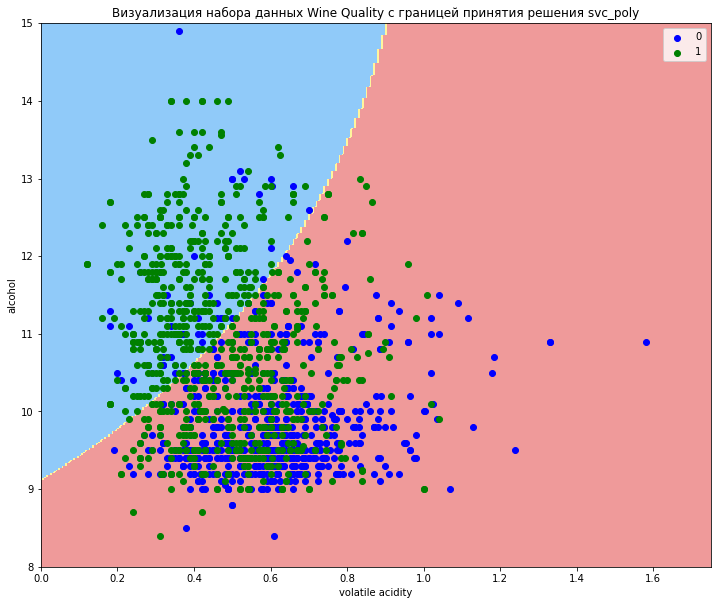

In [49]:
plt.figure(figsize=(12,10))
plot_decision_boundary(poly_svc, axis=[0, 1.75, 8, 15])
plt.scatter(x_tmp0['volatile acidity'], x_tmp0['alcohol'], color='b', label='0')
plt.scatter(x_tmp1['volatile acidity'], x_tmp1['alcohol'], color='g', label='1')
plt.xlabel('volatile acidity')
plt.ylabel('alcohol')
plt.title("Визуализация набора данных Wine Quality c границей принятия решения svc_poly")
plt.legend()

9. 	Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов.  

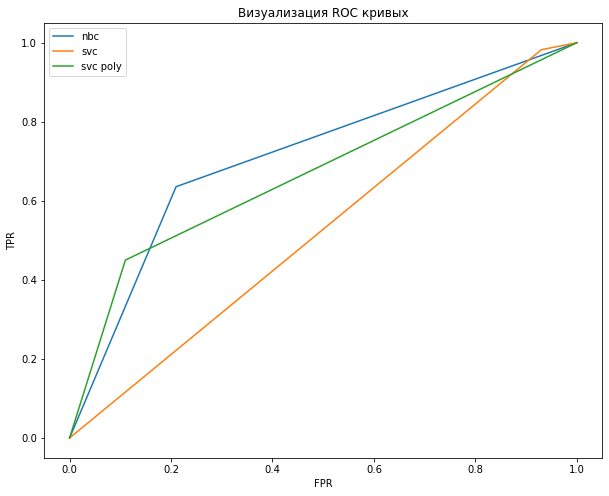

In [50]:
from sklearn.metrics import roc_curve

fprs1, tprs1, thresholds = roc_curve(y_test, y_pred_nbc)
fprs2, tprs2, thresholds = roc_curve(y_test, y_pred_svc) 
fprs3, tprs3, thresholds = roc_curve(y_test, y_pred_poly)

plt.figure(figsize=(10,8))
plt.plot(fprs1, tprs1, label='nbc')
plt.plot(fprs2, tprs2, label='svc')
plt.plot(fprs3, tprs3, label='svc poly')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("Визуализация ROC кривых")
plt.legend()

10.	Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п. 9. 

In [51]:
from sklearn.metrics import roc_auc_score

print('Площадь для наивного байесовского классификатора - ', roc_auc_score(y_test, y_pred_nbc))
print('Площадь для метода опорных векторов - ', roc_auc_score(y_test, y_pred_svc))
print('Площадь для метода опорных векторов с полиномиальными зависимостями - ', roc_auc_score(y_test, y_pred_poly))
# лучшим методом является метод опорных векторов с полиномиальными зависимостями

Площадь для наивного байесовского классификатора -  0.7128571428571429
Площадь для метода опорных векторов -  0.5260714285714285
Площадь для метода опорных векторов с полиномиальными зависимостями -  0.67
